Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

Name: Kayla Kim 

In [2]:
%matplotlib inline
%precision 16
from __future__ import print_function
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 8:  Linear Algebra Part 2

## Question 1

We know that interpolation using equispaced points is not ideal but we can also show that it is ill-conditioned.  To illustrate this let $x_1, \ldots, x_n$ and $y_1, \ldots, y_m$ by $n$ and $m$ equispaced points from $-1$ to $1$ repectively.

**(a)** [10] Derive a formula for the $m \times n$ matrix $A$ that maps an $n$-vector of data at $\{x_j\}$ to an $m$-vector of sampled values $\{\mathcal{P}(y_j)\}$, where $\mathcal{P}$ is the degree $n-1$ polynomial interpolant of the data.

YOUR ANSWER HERE

Based on Vandermonde Matrix example in lectures (https://github.com/mandli/intro-numerical-methods/blob/master/10_LA_intro.ipynb)

We want to find the matrix $A$ that maps an $n$-vector of data into a $m$-vector polynomial of order $n-1$. 

Let the $n$-vector be given by $(x_i, k_i)$ such that 

$$
    K = \begin{bmatrix}
        k_1 \\ k_2 \\ \vdots \\ k_n
    \end{bmatrix}
    = \begin{bmatrix} 
        1 & x_1 & x_1^2 & \cdots & x_1^{n-1} \\
        1 & x_2 & x_2^2 & \cdots & x_2^{n-1} \\
        \vdots \\
        1 & x_n & x_n^2 & \cdots & x_n^{n-1} \\
    \end{bmatrix}
    \begin{bmatrix}
        c_0 \\ c_1 \\ \vdots \\ c_{n-1}
    \end{bmatrix}
$$

In other words, we define $K=XC$. Then, let 

$$
    Y = \begin{bmatrix} 
        1 & y_1 & y_1^2 & \cdots & y_1^{n-1} \\
        1 & y_2 & y_2^2 & \cdots & y_2^{n-1} \\
        \vdots \\
        1 & y_m & y_m^2 & \cdots & y_m^{n-1} \\
    \end{bmatrix}
$$

Then, $AK = A(XC) = YC$, so that $A = YX^{-1}$. in other words, 
$
    A = \begin{bmatrix} 
        1 & x_1 & x_1^2 & \cdots & x_1^{n-1} \\
        1 & x_2 & x_2^2 & \cdots & x_2^{n-1} \\
        \vdots \\
        1 & x_n & x_n^2 & \cdots & x_n^{n-1} \\
    \end{bmatrix} 
    \begin{bmatrix} 
        1 & y_1 & y_1^2 & \cdots & y_1^{n-1} \\
        1 & y_2 & y_2^2 & \cdots & y_2^{n-1} \\
        \vdots \\
        1 & y_m & y_m^2 & \cdots & y_m^{n-1} \\
    \end{bmatrix} ^{-1}
$

**(b)** [5]) Write a program to calculate $A$ and plot $||A||_\infty$ on a semilog scale for $n=1, 2, \ldots, 30$, $m=2n-1$.  In the continuous limit $m \rightarrow \infty$, the numbers $||A||_\infty$ are known as the Lebesgue constants for equispaced interpolation, which are asymptotic to $2^n / (e(n-1) \log n)$ as $n \rightarrow \infty$.

<ipython-input-43-1d93bb30fbaa>:39: RuntimeWarning: divide by zero encountered in true_divide
  f = lambda n: 2**n / (numpy.e*(n-1)*numpy.log(n))


Text(0.5, 1.0, 'Lebesgue constants for Equispaced Interpolation')

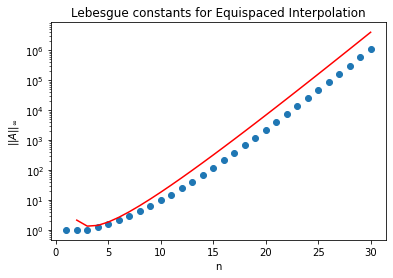

In [43]:
# YOUR CODE HERE

# function to calculate A
def calculateA(n):
    m = 2*n - 1
    x = numpy.zeros((n,1))
    y = numpy.zeros((m,1))
    Y = numpy.zeros([m,n])
    X = numpy.zeros([n,n])
    
    for i in range(0, n):
        x[i] = -1 + 2/float(n-1) * (i)
        
    for i in range(0, m):
        y[i] = -1 + 2/float(m-1) * (i)
        
    for i in range(0, n):
        for j in range(0, n):
            X[i,j] = x[i]**j
            
    for i in range(0, m):
        for j in range(0, n):
            Y[i,j] = y[i]**j
    
    invX = numpy.linalg.inv(X)
    A = numpy.dot(Y, invX)
    
    return A

# computing ||A||_inf
n = numpy.linspace(1, 30, 30)
norm = numpy.ones([30, 1])

for i in range(2, 30):
    A = calculateA(i)
    norm[i] = numpy.linalg.norm(A, ord = numpy.inf)

# Lebesgue constants 
f = lambda n: 2**n / (numpy.e*(n-1)*numpy.log(n))

plt.semilogy(n, norm, 'o')
plt.semilogy(n, f(n), 'r')
plt.xlabel("n")
plt.ylabel("$||A||_\infty$")
plt.title("Lebesgue constants for Equispaced Interpolation")


**(c)** [10] Derive a general way to compute the $\infty$-norm condition number $\kappa$ of the problem of interpolating the function $f(x) = 1$.  Plot the result for $n=1,2,\ldots,30$ and $m=2n-1$.  Hint:  Use the expression we found involving the Jacobian.

YOUR ANSWER HERE

Based on lecture notes (https://github.com/mandli/intro-numerical-methods/blob/master/12_LA_conditioning_stability.ipynb)

For the interpolating function $f(x) = 1$, $f(x) = A \overrightarrow x = [1, 1, ..., 1]$. Since we found in part (a) that $A = YX^{-1}$, i.e. $Y = AX$, we can use the Jacobian expression to write: 

$$
    |J(x)|_{ij} = \frac{\partial f_i}{\partial x_j} (x)= A \\
    \kappa = \frac{||J(x)||_\infty}{||f(x)||_\infty / ||x||\infty} \\
    = \frac{||J(x)||_\infty}{||Ax||_\infty / ||x||\infty} \\
    = \frac{||A||_\infty}{1/1} = ||A||_\infty
$$

So the $\infty$-norm condition number $\kappa = ||A||_\infty$

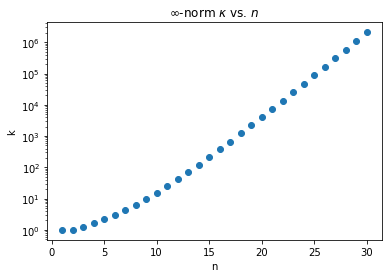

In [13]:
# YOUR CODE HERE

nums = []
kappa = []
for n in range(1, 31):
    nums.append(n)
    m = 2*n - 1
    x = numpy.linspace(-1, 1, n)
    y = numpy.linspace(-1, 1, m)
    
    Y = numpy.vander(y, N=n, increasing=True)
    X = numpy.vander(x, increasing=True)
    invX = numpy.linalg.inv(X)
    A = numpy.dot(Y, invX)
    
    kappa.append(numpy.linalg.norm(A, numpy.inf))

plt.semilogy(nums, kappa, 'o')
plt.xlabel("n")
plt.ylabel("k")
plt.title("$\infty$-norm $\kappa$ vs. $n$")
plt.show()

## Question 2 - LU Factorization

Gaussian elimination is usually one of the first operations students learn in linear algebra but we seemed to have skipped it in lecture!  Let us fix that here in the homework.  Make sure to read the lecture on Gaussian elimination when doing this question.

**(a)** [10] By hand compute the $LU$ factorization of the matrix
$$
    A = \begin{bmatrix}
        4 & 8 & 1 \\
        8 & 20 & 4 \\
        16 & 36 & 7
    \end{bmatrix}.
$$
Make sure to compute all the way to the matrix $L$, not the components of the inverse.  You do not have to worry about pivoting.

YOUR ANSWER HERE

Given 
$
    A = \begin{bmatrix}
        4 & 8 & 1 \\
        8 & 20 & 4 \\
        16 & 36 & 7
    \end{bmatrix}
$, we start by setting 

$$
    \begin{bmatrix}
        1 & 0 & 0 \\
        0 & 1 & 0 \\
        0 & 0 & 1 
    \end{bmatrix}
    \begin{bmatrix}
        4 & 8 & 1 \\
        8 & 20 & 4 \\
        16 & 36 & 7
    \end{bmatrix}
$$

$R_2 - 2R_1$: 

$$
    \begin{bmatrix}
        1 & 0 & 0 \\
        2 & 1 & 0 \\
        0 & 0 & 1 
    \end{bmatrix}
    \begin{bmatrix}
        4 & 8 & 1 \\
        0 & 4 & 2 \\
        16 & 36 & 7
    \end{bmatrix}
$$

$R_3 - 4R_1$: 

$$
    \begin{bmatrix}
        1 & 0 & 0 \\
        2 & 1 & 0 \\
        4 & 0 & 1 
    \end{bmatrix}
    \begin{bmatrix}
        4 & 8 & 1 \\
        0 & 4 & 2 \\
        0 & 4 & 3
    \end{bmatrix}
$$

$R_3 - R_2$: 

$$
    \begin{bmatrix}
        1 & 0 & 0 \\
        2 & 1 & 0 \\
        4 & 1 & 1 
    \end{bmatrix}
    \begin{bmatrix}
        4 & 8 & 1 \\
        0 & 4 & 2 \\
        0 & 0 & 1
    \end{bmatrix}
$$

So $$
    L = \begin{bmatrix}
        1 & 0 & 0 \\
        2 & 1 & 0 \\
        4 & 1 & 1 
    \end{bmatrix}
$$ 
and 
$$
    U = \begin{bmatrix}
        4 & 8 & 1 \\
        0 & 4 & 2 \\
        0 & 0 & 1
    \end{bmatrix}
$$

**(b)** [10] Write a function that computes the $LU$ factorization of a given matrix $A \in \mathbb R^{n \times n}$ without using `numpy` or `scipy` packages.  Make sure to also return the pivoting matrix, i.e. compute the matrices $P$, $L$, and $U$ where
$$
    P A = L U.
$$
Note that the provided function `swap_rows` may be useful although you do not have to use it.  You may also want to use the example in the notes to test your basic algorithm with (i.e. `A = numpy.array([[2, 1, 1, 0], [4, 3, 3, 1], [8, 7, 9, 5], [6, 7, 9, 8]], dtype=float)` noting that the algorithm will complain without the casting to `float`).

In [19]:
def swap_rows(i, j, A, column_indices=None):
    r"""
    Swap the ith and jth rows of the matrix A in place
    
    Optional argument column_indices is a tuple that controls 
    the columns being swapped.  Defaults to the entire row.
    """
    if column_indices is None:
        column_indices = (0, A.shape[0])
    
    pivot_row = A[i, column_indices[0]:column_indices[1]].copy()
    A[i, column_indices[0]:column_indices[1]] = A[j, column_indices[0]:column_indices[1]]
    A[j, column_indices[0]:column_indices[1]] = pivot_row

    
# Based on LU partial pivoting algorithm: 
# https://github.com/mandli/intro-numerical-methods/blob/master/15_LA_gaussian.ipynb 

def LU_factorization(A):
    # YOUR CODE HERE
    
    m = A.shape[0]
    U = A.copy()
    L = numpy.identity(len(A))
    P = numpy.identity(len(A))
    for k in range(m):
        i = numpy.argmax(numpy.abs(U[k:m, k]))
        i += k
        swap_rows(i, k, U, [k,m])
        swap_rows(i, k, L, [0,k])
        swap_rows(i, k, P)
        for j in range(k+1, m):
            L[j, k] = U[j, k] / U[k, k]
            U[j, k:m] = U[j, k:m] - L[j, k] * U[k, k:m]
    return P, L, U

In [20]:
import scipy.linalg
# A = numpy.array([[2, 1, 1, 0], [4, 3, 3, 1], [8, 7, 9, 5], [6, 7, 9, 8]], dtype=float)
A = numpy.random.uniform(low=1.0, high=10.0, size=(25, 25))
P, L, U = LU_factorization(A)
P_s, L_s, U_s = scipy.linalg.lu(A)
numpy.testing.assert_allclose(P, numpy.linalg.inv(P_s))
numpy.testing.assert_allclose(L, L_s)
numpy.testing.assert_allclose(U, U_s, atol=1e-8)
print("Success!")

Success!


**(c)** [10] For this question write a function that solves the system $A x = b$ given an $A$ and $b$ using your $LU$ factorization function and the pivot matrix.  Again do not use any of the functions from `numpy` or `scipy` other than to check your solution.

In [21]:
# based on solving Ax=b: 
# https://github.com/mandli/intro-numerical-methods/blob/master/15_LA_gaussian.ipynb

def solve(A, b):
    # YOUR CODE HERE
    P, L, U = LU_factorization(A)
    m = len(A)
    x = numpy.zeros(m)
    y = numpy.zeros(m)
    Pb = numpy.dot(P, b)

    # forward substitution
    for i in range(0, m):
        Ly = 0
        for j in range(0,i):
            Ly += L[i,j] * y[j]  
        y[i] = Pb[i]-Ly
 
    # backward substitution
    for i in range(1, m+1):  
        Ux = 0        
        for j in range(1,i):
            Ux += U[m-i,m-j] * x[m-j]
        y[m-i] -= Ux
        x[m-i] = y[m-i] / U[m-i,m-i]
        x[m-1] = y[m-1] / U[m-1,m-1]
    
    return x

In [22]:
m = 10
A = numpy.random.uniform(size=(m, m))
b = numpy.random.uniform(size=(m))
x = solve(A, b)
x_n = numpy.linalg.solve(A, b)
numpy.testing.assert_allclose(x, x_n)
print("Success!")

Success!


## Question 3

Consider the system of equations $Ax = b$ defined by
$$A = \begin{bmatrix}
        0.780 & 0.563 \\
        0.913 & 0.659 
    \end{bmatrix}
    \quad \text{and} \quad 
    b = \begin{bmatrix}
        0.217 \\
        0.254 
    \end{bmatrix}.
$$
The true solution of this system is $$x^T = [1, -1]$$.  Consider for the following questions the approximate solutions
$$
    x^T_1 = [0.999, -1.001] \quad \text{and} \quad x^T_2 = [0.341, -0.087]
$$
and define the residual $r(y)$ as
$$
    r(y) = b - A y.
$$

**(a)** [10] Compute the residuals (you may use `numpy`) $||r(x_1)||$ and $||r(x_2)||$ for the two approximate solutions using a couple of different norms.  Does the more accurate solution have a smaller residual?  Does it matter which norm you use?

In [25]:
# constructing matrices 
A = numpy.array([[0.780, 0.563], [0.913, 0.659]])
b = numpy.array([[0.217], [0.254]])
x1 = numpy.array([[0.999], [-1.001]])
x2 = numpy.array([[0.341], [-0.087]])

# res
rx1 = b - A*x1
rx2 = b - A*x2 

# 1, 2, inf norms 
rx1_1 = numpy.linalg.norm(rx1,ord=1)
rx1_2 = numpy.linalg.norm(rx1,ord=2)
rx1_inf = numpy.linalg.norm(rx1,ord=numpy.inf)

rx2_1 = numpy.linalg.norm(rx2,ord=1)
rx2_2 = numpy.linalg.norm(rx2,ord=2)
rx2_inf = numpy.linalg.norm(rx2,ord=numpy.inf)

print("Computed r(x1) with 1-norm:   %s" % rx1_1)
print("Computed r(x1) with 2-norm:   %s" % rx1_2)
print("Computed r(x1) with inf-norm: %s \n" % rx1_inf)

print("Computed r(x2) with 1-norm:   %s" % rx2_1)
print("Computed r(x2) with 2-norm:   %s" % rx2_2)
print("Computed r(x2) with inf-norm: %s" % rx2_inf)

Computed r(x1) with 1-norm:   1.730133
Computed r(x1) with 2-norm:   1.6216011428041541
Computed r(x1) with inf-norm: 2.081572 

Computed r(x2) with 1-norm:   0.38241100000000006
Computed r(x2) with 2-norm:   0.4565738878802673
Computed r(x2) with inf-norm: 0.6447640000000001


YOUR ANSWER HERE

The more accurate solution, x1, has larger residuals than x2. The 2-norm for x1 has the lowest residual. 

**(b)** [10] Compute $||A||$, $||A^{-1}||$ and the condition number $\kappa(A)$ of the matrix using the $L_2$ and $L_\infty$ norms.  Again you can use `numpy`.

In [26]:
A_2 = numpy.linalg.norm(A, ord=2)
A_inf = numpy.linalg.norm(A, ord = numpy.inf)

invA = numpy.linalg.inv(A)
invA_2 = numpy.linalg.norm(invA, ord=2)
invA_inf = numpy.linalg.norm(invA, ord = numpy.inf)

KA_1 = numpy.linalg.cond(A, p=2)
KA_inf = numpy.linalg.cond(A, p=numpy.inf)

print("Computed ||A|| with 2-norm:   %s" % A_2)
print("Computed ||A|| with inf-norm: %s \n" % A_inf)

print("Computed ||A^{-1}|| with 2-norm:   %s" % invA_2)
print("Computed ||A^{-1}|| with inf-norm: %s \n" % invA_inf)

print("Condition Number K(A) with 2-norm:   %s" % KA_1)
print("Condition Number K(A) with inf-norm: %s" % KA_inf)

Computed ||A|| with 2-norm:   1.4809520586432041
Computed ||A|| with inf-norm: 1.572 

Computed ||A^{-1}|| with 2-norm:   1480952.0584615201
Computed ||A^{-1}|| with inf-norm: 1692999.9997923018 

Condition Number K(A) with 2-norm:   2193218.99965077
Condition Number K(A) with inf-norm: 2661395.9996734983


**(c)** [15] Explain the behavior from part (a) using the results of part (b) discussing how condition numbers play a role in the problem above.  Hint:  Think about the problem where only the vector $x$ is perturbed by some small amount $\delta x$

YOUR ANSWER HERE

We note that the condition numbers depend on the degree of the norm used. From part(b) we find that the larger the condition number (i.e. the more ill-conditioned the matrix is), then even relatively small $\delta x$ on $b$ and the residual can lead to large errors and instability, which explains the behavior from part (a). 

